In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,KFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo.csv


In [3]:
Zoo = pd.read_csv("Zoo.csv")
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
Zoo.shape

(101, 18)

In [5]:
Zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
Zoo.isnull().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

In [8]:
Zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
Zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [10]:
Zoo.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [11]:
Zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


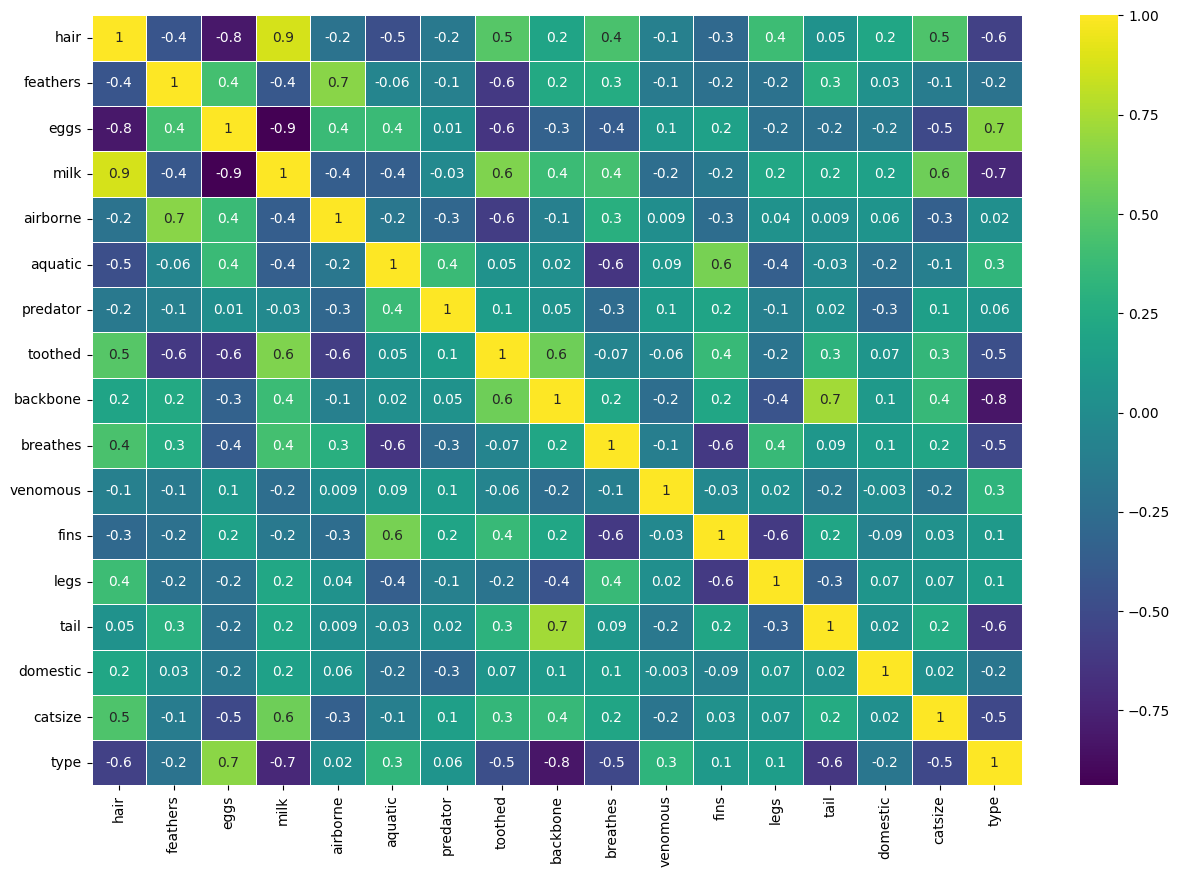

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(Zoo.corr(), annot =True, fmt='.1g', cmap='viridis', linewidth=0.5, linecolor = 'white');


In [14]:
Zoo_df = Zoo.copy()
Zoo_df['has_legs'] = np.where(Zoo_df['legs']>0,1,0)
Zoo_df = Zoo_df[['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']]
Zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


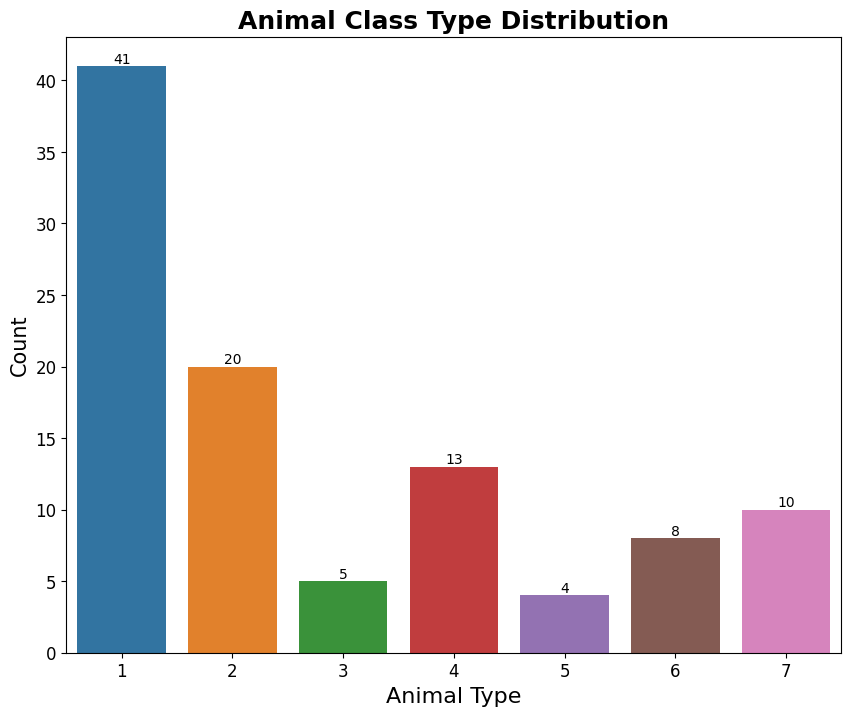

In [21]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x=Zoo['type'].value_counts().index.tolist(), y = Zoo['type'].value_counts().tolist())
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Animal Class Type Distribution", fontsize = 18, fontweight = 'bold')
plt.xlabel("Animal Type", fontsize = 16)
plt.ylabel('Count', fontsize = 15)
for i in ax.containers:
    ax.bar_label(i,)

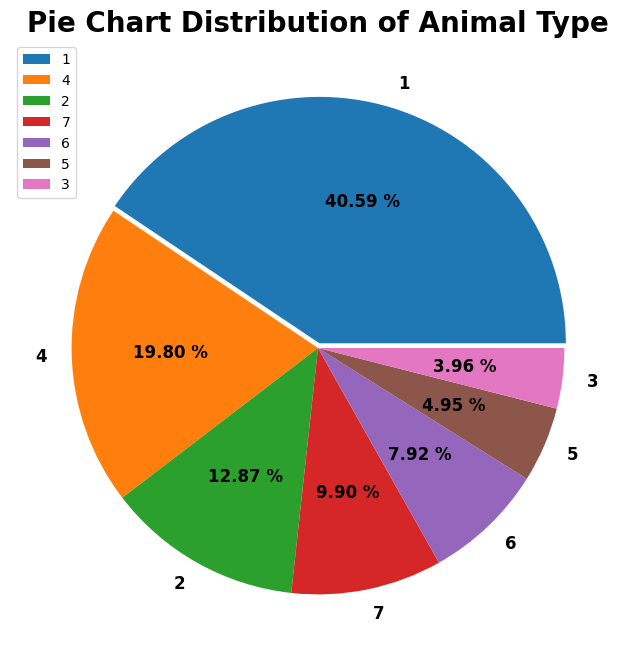

In [23]:
plt.figure(figsize = (8,8))
plt.pie(Zoo['type'].value_counts(), labels = Zoo.type.unique(),
        explode = [0.02, 0.0,0.0,0.0,0.0,0.0,0.0,],autopct = '%.2f %%',
        textprops = {'size':'large', 'fontweight':'bold'})
plt.legend(loc='upper left')
plt.title("Pie Chart Distribution of Animal Type", fontsize = 20, fontweight= 'bold')
plt.show()

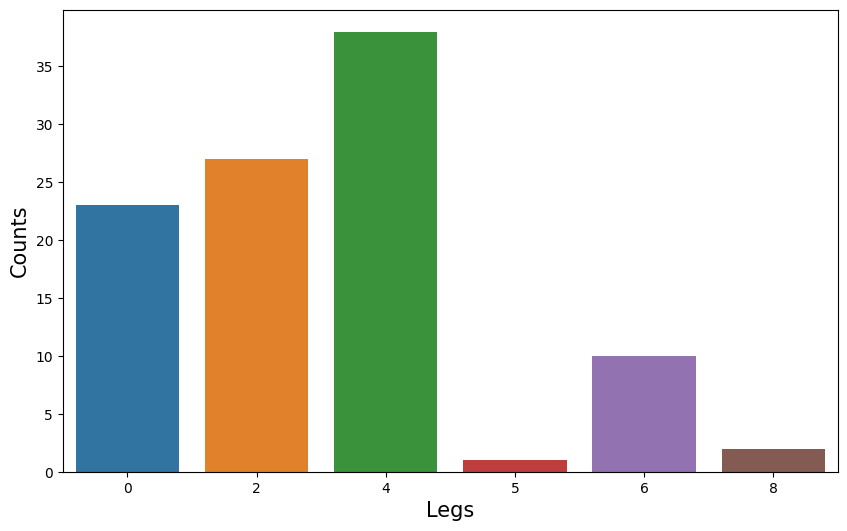

In [24]:
fig = plt.subplots(figsize=(10,6))
sns.countplot(x = Zoo['legs'])
plt.xlabel('Legs',fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.show()

Most of the Animals Consist of 4 Legs and,

Least Number of Animals Consist of 5 Legs

In [25]:
Zoo = Zoo.drop(["animal name"],axis = 1)
Zoo.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [26]:
#Train_Test_Split

X = Zoo.drop('type', axis =1)
y = Zoo[['type']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 13)

In [30]:
print("Shape Of X_train :", X_train.shape)
print("Shape Of X_test :", X_test.shape)
print("Shape Of y_train :", y_train.shape)
print("Shape Of y_test :", y_test.shape)

Shape Of X_train : (80, 16)
Shape Of X_test : (21, 16)
Shape Of y_train : (80, 1)
Shape Of y_test : (21, 1)


In [31]:
std  = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

Grid Search For Best Value of K

In [35]:
#Get score for different values of N
k_list  = np.arange(1,21,2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(21,1)
    score = cross_val_score(knn,X_train, y_train, cv=10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [36]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [38]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model , param_grid=param_grid, cv=10)
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [39]:
print(grid.best_score_)
grid.best_params_

0.95


{'n_neighbors': 3}

Visualizing CV Results

In [41]:
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []

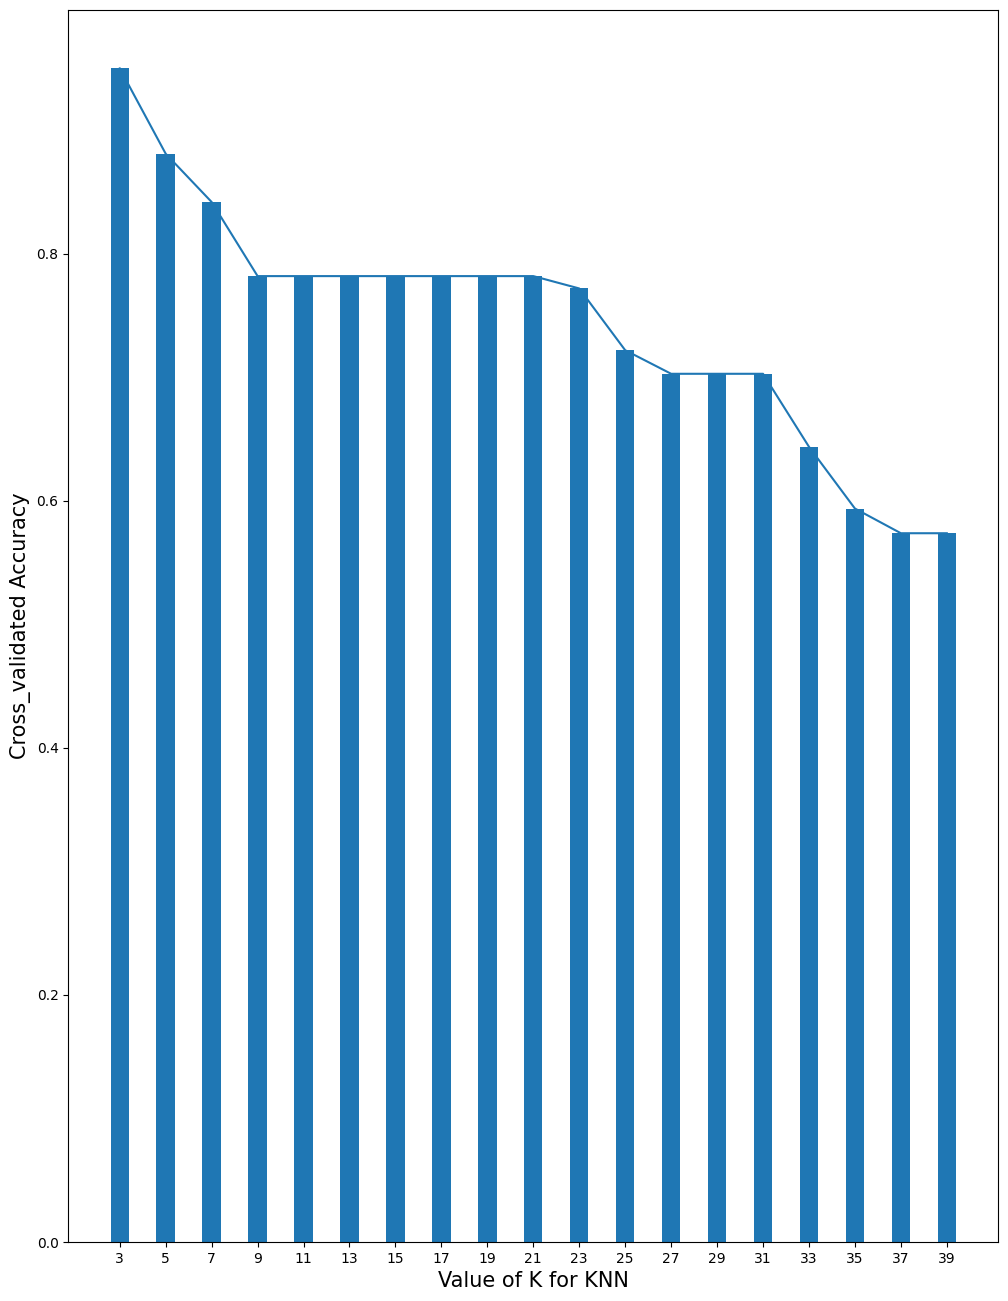

In [42]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv=10)
    k_scores.append(scores.mean())

plt.figure(figsize=(12,16))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN', fontsize = 15)
plt.ylabel('Cross_validated Accuracy', fontsize = 15)
plt.xticks(k_range)
plt.show()

In [43]:
pd.DataFrame(k_scores).sort_values(0, ascending=False).head()

,0
0,0.950000
1,0.880909
2,0.841818
6,0.781818
8,0.781818


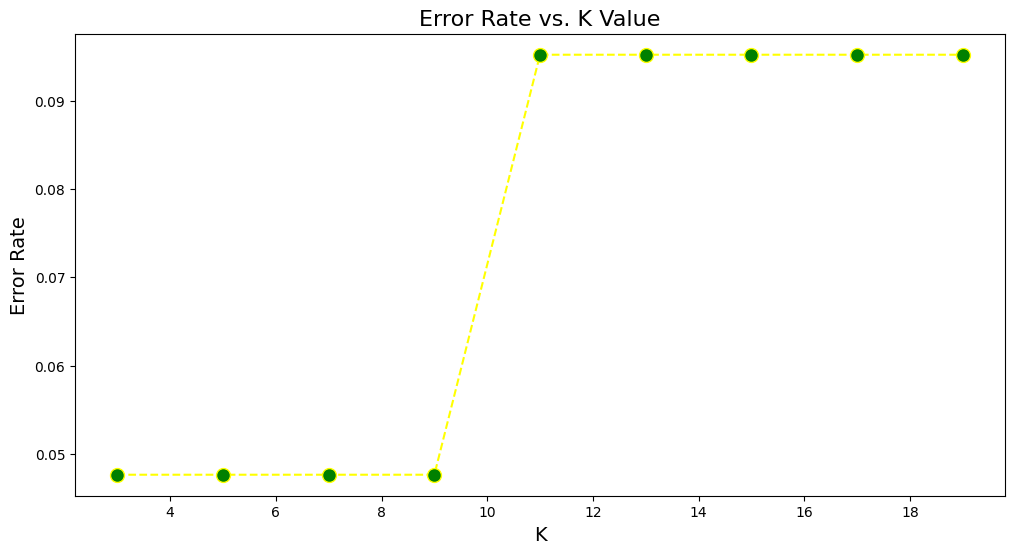

In [44]:
error_rate = []
k_range = [i for i in range(3,21,2)]

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(21,1)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot([i for i in range(3,21,2)],error_rate,color='yellow', linestyle='dashed',
         marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value',fontsize = 16)
plt.xlabel('K', fontsize = 14)
plt.ylabel('Error Rate', fontsize = 14)
plt.show()

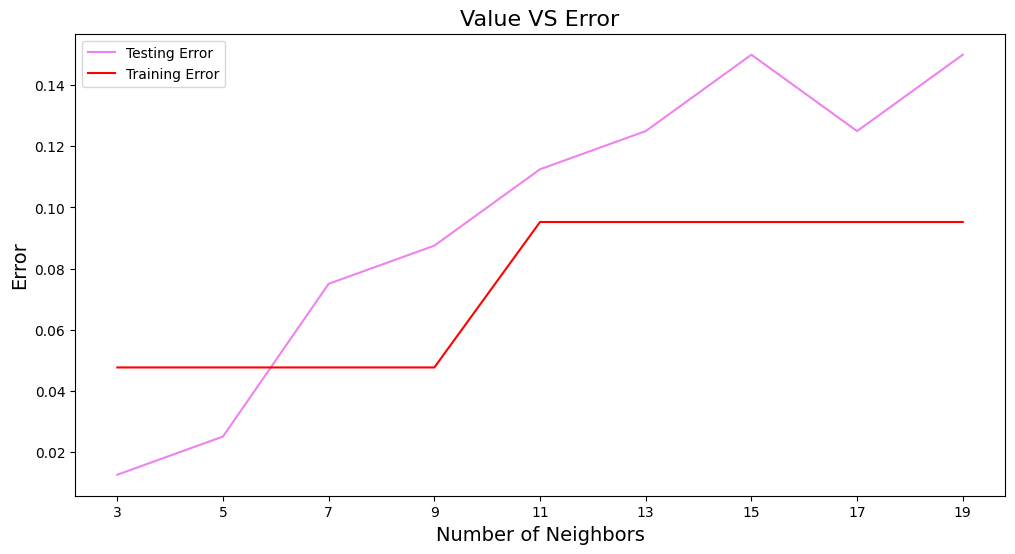

In [48]:
error1 = []
error2 = []
k_range = [i for i in range(3,21,2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    y_pred1 = y_pred1.reshape(80,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    y_pred2 = y_pred2.reshape(21,1)
    error2.append(np.mean(y_test!= y_pred2))

plt.figure(figsize=[12,6])
plt.plot(k_range, error1, label = 'Testing Error',color='violet')
plt.plot(k_range, error2, label = 'Training Error',color = 'red')
plt.legend()
plt.title('Value VS Error', fontsize = 16)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Error', fontsize = 14)
plt.xticks(k_range)
plt.show()

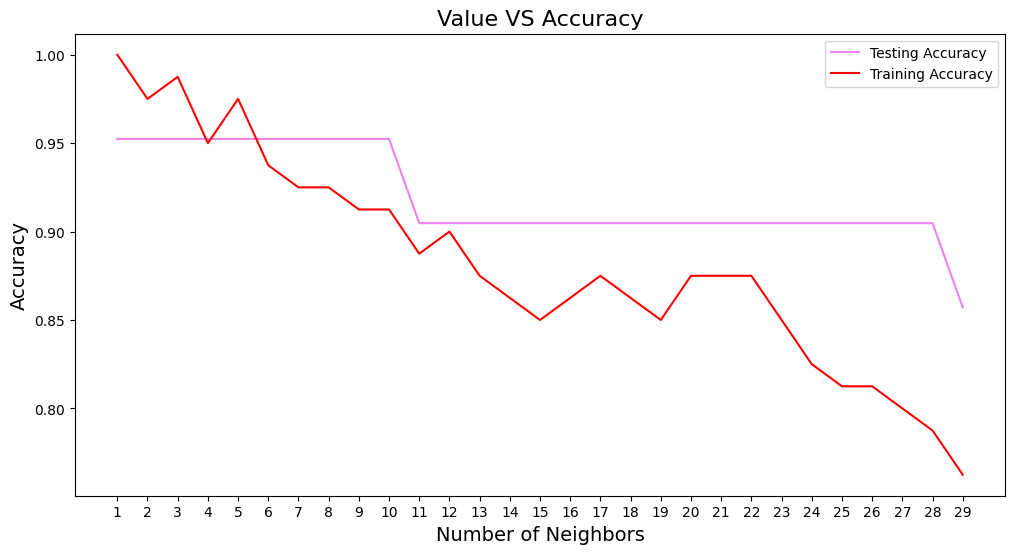

In [50]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(1,30)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

plt.figure(figsize=[12,6])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy',color='violet')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy',color = 'red')
plt.legend()
plt.title('Value VS Accuracy',fontsize = 16)
plt.xlabel('Number of Neighbors',fontsize = 14)
plt.ylabel('Accuracy',fontsize = 14)
plt.xticks(k_range)
plt.show()

Applying K-Nearest Neigbors(KNN)

In [52]:
#KNN using K=3

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=3


[[10  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  1]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



In [54]:
#KNN using K=5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=5


[[10  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  1]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



In [55]:
#Classifier into Training_Set

from sklearn.pipeline import Pipeline
classifier_knn = KNeighborsClassifier()
steps = [('model', KNeighborsClassifier())]
knn_pipe = Pipeline(steps)

In [56]:
parameters = {'model__algorithm' : ['brute'], 'model__leaf_size' : [30,50,70,90,110],
              'model__metric' : ['minkowski'], 'model__p' : [1], 'model__n_neighbors' : [3,5,7,9],
              'model__weights' : ['uniform', 'distance'], 'model__n_jobs' : [-1]}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv= 10)
classifier_knn = classifier_knn.fit(X_train, y_train.values.ravel())

In [57]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training Accuracy :", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Testing Accuracy  :", accuracy_knn_test)

Training Accuracy : 1.0
Testing Accuracy  : 0.9523809523809523
